# Simulate a geological source

### Things we have to import

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [4]:
import time

In [5]:
import pickle

In [6]:
from gravmag import data_structures, utils, aux_vedo
from gravmag.models import rectangular_prism as rp

In [7]:
from gravmag import plot_functions as plf

In [8]:
import vedo

In [9]:
# set the backend for vedo
vedo.settings.default_backend= 'vtk'
#vedo.settings.default_backend= '2d'

In [10]:
from PIL import Image

### Create the model

In [11]:
# Set the model area
# minimum x, maximum x, minimum y and maximum y
model_area = [-5100, 4900, -3800, 6200]

In [12]:
# dictionary to store the model
model = dict()

#### Main model

In [13]:
# Create a model formed by a five prisms
Nmain = 5
prisms_main = np.array([[-500, 500, 0, 2000, 10, 1010],
                        [-1500, -500, 1000, 3000, 100, 1200],
                        [1000, 3000, 2000, 2500, 90, 1500],
                        [-4000, -1000, -3000, 1000, 100, 1400],
                        [-3000, 1000, -2000, 4000, 1000, 1500]])

In [14]:
# generate random total-magnetization intensity (A / m) values
rng = np.random.default_rng(126543786908888123)
mag_intensities_main = rng.uniform(low=2, high=3, size=Nmain)

In [15]:
# set constant total-magnetization inclination and declination (°) values
mag_incs_main = np.zeros(Nmain) - 10.2
mag_decs_main = np.zeros(Nmain) - 19.8

#### Geological noise

In [16]:
# center of Ns sources randomly distributed in the simulated area
Ngn = 300

xgn = model_area[0] + (model_area[1] - model_area[0])*np.random.rand(Ngn)
ygn = model_area[2] + (model_area[3] - model_area[2])*np.random.rand(Ngn)
zgn_top = 100.*np.random.rand(Ngn)

# sizes 
Lgn = 100. + 200*np.random.rand(Ngn)

# total magnetizations
mag_intensities_gn = np.random.rand(Ngn)
mag_incs_gn = np.zeros(Ngn) - 10.2
mag_decs_gn = np.zeros(Ngn) - 19.8

# create the sources
prisms_gn = np.zeros((Ngn, 6))
prisms_gn[:,0] = xgn - 0.5*Lgn
prisms_gn[:,1] = xgn + 0.5*Lgn
prisms_gn[:,2] = ygn - 0.5*Lgn
prisms_gn[:,3] = ygn + 0.5*Lgn
prisms_gn[:,4] = 0.
prisms_gn[:,5] = zgn_top + Lgn

In [17]:
prisms = np.vstack([prisms_main, prisms_gn])
mag_intensities = np.hstack([mag_intensities_main, mag_intensities_gn])
mag_incs = np.hstack([mag_incs_main, mag_incs_gn])
mag_decs = np.hstack([mag_decs_main, mag_decs_gn])

In [18]:
prisms_dict = {
    'x1' : prisms[:,0],
    'x2' : prisms[:,1],
    'y1' : prisms[:,2],
    'y2' : prisms[:,3],
    'z1' : prisms[:,4],
    'z2' : prisms[:,5]
}

In [19]:
prisms_long_wavelength_dict = {
    'x1' : prisms_main[4:,0],
    'x2' : prisms_main[4:,1],
    'y1' : prisms_main[4:,2],
    'y2' : prisms_main[4:,3],
    'z1' : prisms_main[4:,4],
    'z2' : prisms_main[4:,5]
}

prisms_mid_wavelength_dict = {
    'x1' : prisms_main[:4,0],
    'x2' : prisms_main[:4,1],
    'y1' : prisms_main[:4,2],
    'y2' : prisms_main[:4,3],
    'z1' : prisms_main[:4,4],
    'z2' : prisms_main[:4,5]
}

In [20]:
model['prisms'] = prisms_dict
model['mag-intensities'] = mag_intensities
model['mag-inclinations'] = mag_incs
model['mag-declinations'] = mag_decs

In [21]:
# save the model
file_name = 'synthetic_bodies_mag.pickle'
with open('aula_7c/'+file_name, 'wb') as f:
    pickle.dump(model, f)

#### 2D plot (plan view)

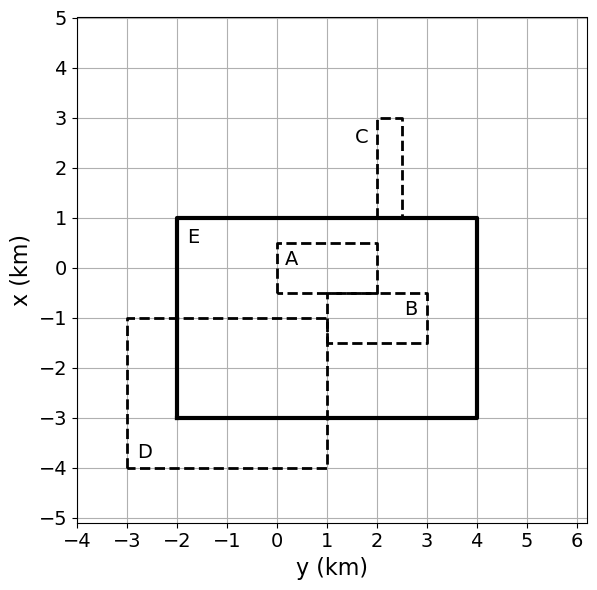

In [22]:
fig, ax = plt.subplots(figsize=(7,6))

ax.axis('scaled')

plf.model_boundaries(
    ax,
    model=prisms_long_wavelength_dict,
    color='k',
    style='-',
    width='3'
)

plf.model_boundaries(
    ax,
    model=prisms_mid_wavelength_dict,
    color='k',
    style='--',
    width='2'
)

ax.set_ylim(0.001*model_area[0], 0.001*model_area[1])
ax.set_xlim(0.001*model_area[2], 0.001*model_area[3])
ax.set_xticks(np.linspace(-4, 6, 11))
ax.set_yticks(np.linspace(-5, 5, 11))
ax.tick_params(axis='both', labelsize=14)
ax.annotate(text='A', xy=(0.15, 0.05), fontsize=14)
ax.annotate(text='B', xy=(2.55, -0.95), fontsize=14)
ax.annotate(text='C', xy=(1.55, 2.50), fontsize=14)
ax.annotate(text='D', xy=(-2.80, -3.80), fontsize=14)
ax.annotate(text='E', xy=(-1.80, 0.50), fontsize=14)
ax.set_xlabel('y (km)', fontsize=16)
ax.set_ylabel('x (km)', fontsize=16)
ax.grid()
plt.tight_layout()

plt.show()

#### 3D Plot

In [23]:
# create a Vedo model of prisms with colors defined by the magnetization intensities
model_vedo = aux_vedo.gravmag2vedo_prisms(
    gravmag_prisms=prisms_dict,
    scalar_props=mag_intensities,
    cmap='jet',
    vmin=np.min(mag_intensities),
    vmax=np.max(mag_intensities)
)


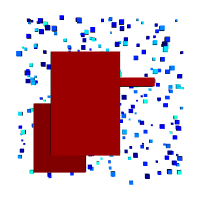

In [24]:
# add a colorbar to the prisms
model_vedo.add_scalarbar(
    title="magnetization (A/m)", 
    pos=(0.8,0.01),
    title_yoffset=15,
    font_size=14,
    nlabels=10,
    horizontal=False,
    label_format=':9.2f'
)

In [25]:
pl = vedo.Plotter()

pl += model_vedo

pl += aux_vedo.custom_axes(model_area+[-500, 1000])

# set a model view
pl.show(
    axes=0, 
    zoom=1, 
    interactive=True
)

pl.close()